# Exploratory Data Analysis for Financial Complaints

This notebook performs exploratory data analysis on consumer complaints data from the CFPB (Consumer Financial Protection Bureau).

We'll cover:
- Data loading and basic statistics
- Distributions of complaints by product, issue, company, and state
- Text analysis of complaint narratives
- Correlation analysis if applicable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import re

# Configuration
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/MYproject/filtered_complaints.csv'
OUTPUT_DIR = 'notebooks'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set seaborn style
sns.set_style('whitegrid')

Mounted at /content/drive


## Data Loading

In [2]:
def load_data():
    """Load the complaints data."""
    if not os.path.exists(DATA_PATH):
        print(f"Data file not found at {DATA_PATH}")
        return None
    try:
        df = pd.read_csv(DATA_PATH, low_memory=False)
        print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

df = load_data()
if df is None:
    raise ValueError("Data not loaded. Please ensure data/raw/complaints.csv exists.")

Data loaded: 21210 rows, 3 columns


## Basic Statistics

In [3]:
print("=== Basic Statistics ===")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(cat_cols)}")

# Numerical columns
num_cols = df.select_dtypes(include=['number']).columns
if len(num_cols) > 0:
    print(f"Numerical columns: {list(num_cols)}")
    df[num_cols].describe()

=== Basic Statistics ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21210 entries, 0 to 21209
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       21210 non-null  object
 1   Consumer complaint narrative  21210 non-null  object
 2   Complaint ID                  21210 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 497.2+ KB

Missing values:
Product                         0
Consumer complaint narrative    0
Complaint ID                    0
dtype: int64

Categorical columns: ['Product', 'Consumer complaint narrative']
Numerical columns: ['Complaint ID']


## Visualizing Distributions

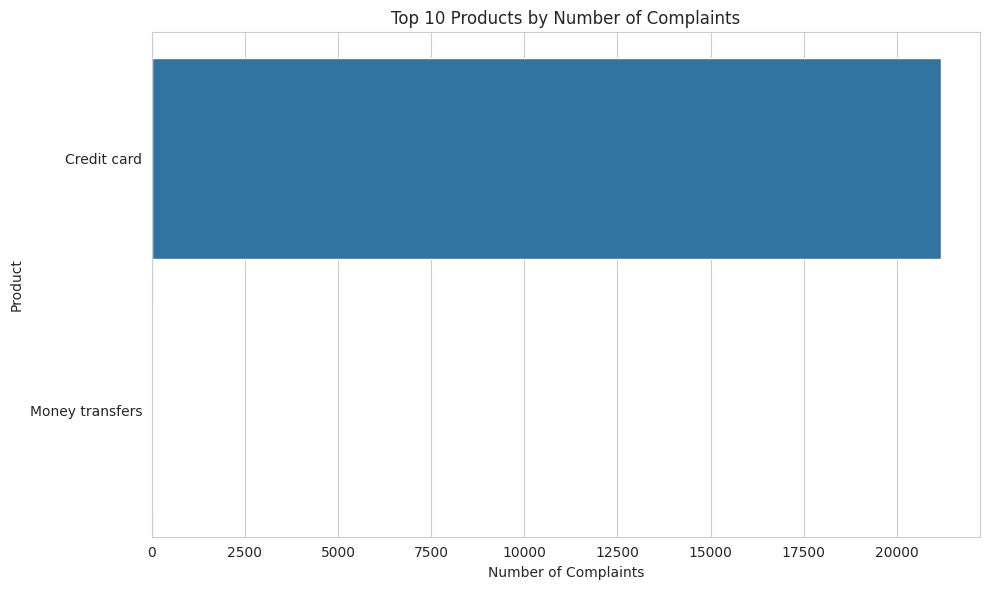

Saved product_distribution.png


In [4]:
# Product distribution
if 'Product' in df.columns:
    plt.figure(figsize=(10, 6))
    top_products = df['Product'].value_counts().head(10)
    sns.barplot(y=top_products.index, x=top_products.values)
    plt.title('Top 10 Products by Number of Complaints')
    plt.xlabel('Number of Complaints')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/product_distribution.png')
    plt.show()
    print("Saved product_distribution.png")

In [5]:
# Issue distribution
if 'Issue' in df.columns:
    plt.figure(figsize=(10, 6))
    top_issues = df['Issue'].value_counts().head(10)
    sns.barplot(y=top_issues.index, x=top_issues.values)
    plt.title('Top 10 Issues by Number of Complaints')
    plt.xlabel('Number of Complaints')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/issue_distribution.png')
    plt.show()
    print("Saved issue_distribution.png")

In [6]:
# Company distribution
if 'Company' in df.columns:
    plt.figure(figsize=(10, 6))
    top_companies = df['Company'].value_counts().head(10)
    sns.barplot(y=top_companies.index, x=top_companies.values)
    plt.title('Top 10 Companies by Number of Complaints')
    plt.xlabel('Number of Complaints')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/company_distribution.png')
    plt.show()
    print("Saved company_distribution.png")

In [7]:
# State distribution
if 'State' in df.columns:
    plt.figure(figsize=(10, 6))
    top_states = df['State'].value_counts().head(10)
    sns.barplot(y=top_states.index, x=top_states.values)
    plt.title('Top 10 States by Number of Complaints')
    plt.xlabel('Number of Complaints')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/state_distribution.png')
    plt.show()
    print("Saved state_distribution.png")

## Text Analysis

Narrative lengths: Mean=207.41, Median=152.00, Max=6469


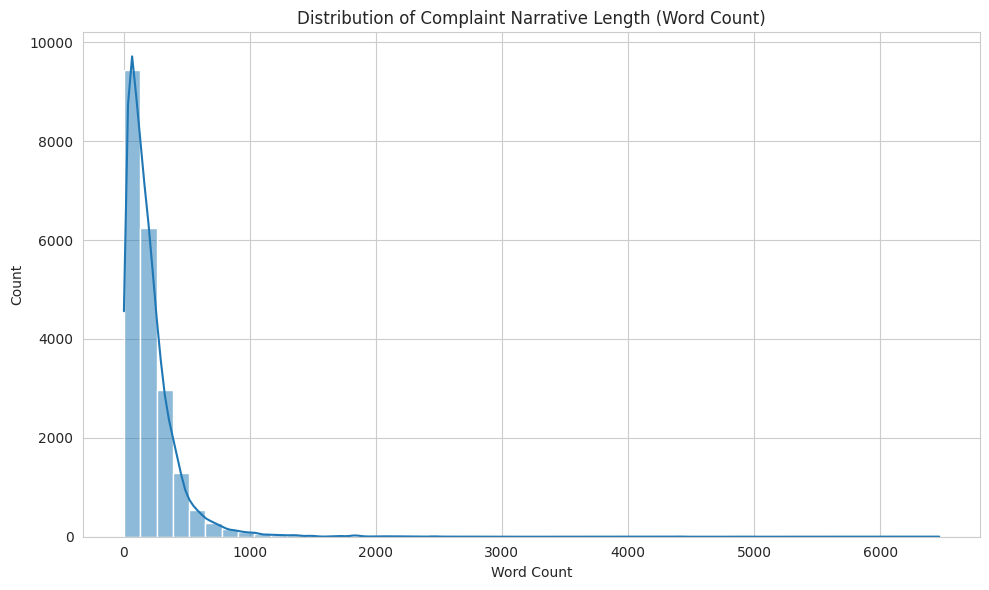

Saved narrative_length_distribution.png


In [8]:
if 'Consumer complaint narrative' in df.columns:
    narratives = df['Consumer complaint narrative'].dropna().astype(str)

    # Narrative lengths
    lengths = narratives.apply(lambda x: len(x.split()))
    print(f"Narrative lengths: Mean={lengths.mean():.2f}, Median={lengths.median():.2f}, Max={lengths.max()}")

    plt.figure(figsize=(10, 6))
    # Sample if too many
    if len(lengths) > 50000:
        lengths = lengths.sample(50000)
    sns.histplot(lengths, bins=50, kde=True)
    plt.title('Distribution of Complaint Narrative Length (Word Count)')
    plt.xlabel('Word Count')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/narrative_length_distribution.png')
    plt.show()
    print("Saved narrative_length_distribution.png")

Top 20 common words:
the: 89686
xxxx: 89650
i: 79644
to: 67976
and: 57019
my: 43184
a: 41210
of: 33205
that: 30672
xx: 29845
was: 28537
on: 25091
this: 22624
in: 21706
for: 21677
credit: 21507
they: 20890
not: 19807
card: 17907
me: 17555


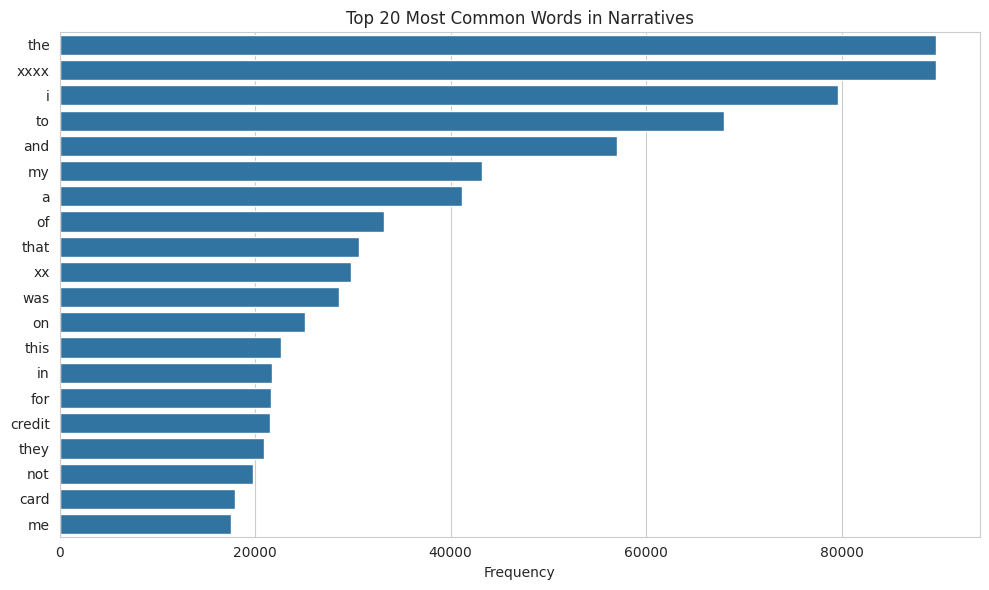

Saved common_words.png


In [9]:
    # Common words
    all_words = []
    for text in narratives.sample(min(10000, len(narratives))):  # Sample for speed
        words = re.findall(r'\b\w+\b', text.lower())
        all_words.extend(words)

    common_words = Counter(all_words).most_common(20)
    print("Top 20 common words:")
    for word, count in common_words:
        print(f"{word}: {count}")

    # Word frequency bar plot
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title('Top 20 Most Common Words in Narratives')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/common_words.png')
    plt.show()
    print("Saved common_words.png")

## Correlation Analysis

In [10]:
num_cols = df.select_dtypes(include=['number']).columns
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/correlation_matrix.png')
    plt.show()
    print("Saved correlation_matrix.png")
else:
    print("Not enough numerical columns for correlation analysis.")

Not enough numerical columns for correlation analysis.


## Summary

This notebook has performed a comprehensive EDA on the complaints data. All plots have been saved to the `notebooks/` directory.